<a href="https://colab.research.google.com/github/Ish05/Natural-Language-Processing-Projects/blob/master/movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing essential libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

#Importing libraries for NLP
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv(r"https://raw.githubusercontent.com/anujvyas/Movie-Genre-Prediction-Deployment/master/kaggle_movie_train.csv")

In [ ]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [ ]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [ ]:

#removing the id column
df.drop("id",axis=1,inplace=True)

In [ ]:
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [ ]:
df.genre.unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [ ]:
df.genre.value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [ ]:
df.genre.values

array(['thriller', 'comedy', 'drama', ..., 'thriller', 'action', 'comedy'],
      dtype=object)

In [ ]:
genre_count=df.groupby("genre").count()
genre_count

,text
genre,
action,2392
adventure,147
comedy,2941
drama,8873
horror,456
other,270
romance,63
sci-fi,613
thriller,6824


In [ ]:
genre_count.index

Index(['action', 'adventure', 'comedy', 'drama', 'horror', 'other', 'romance',
       'sci-fi', 'thriller'],
      dtype='object', name='genre')

In [ ]:
genre_count.index.values

array(['action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller'], dtype=object)

In [ ]:
genre_count["text"]

genre
action       2392
adventure     147
comedy       2941
drama        8873
horror        456
other         270
romance        63
sci-fi        613
thriller     6824
Name: text, dtype: int64

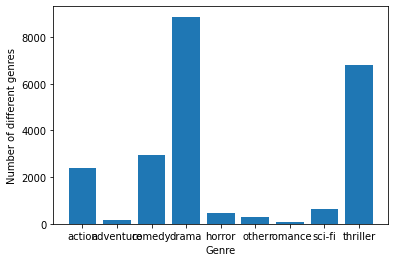

In [ ]:
plt.bar(genre_count.index,genre_count["text"])
plt.xlabel("Genre")
plt.ylabel("Number of different genres")
plt.show()

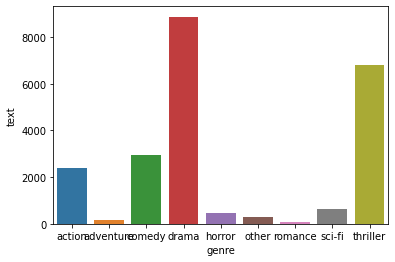

In [ ]:
sns.barplot(genre_count.index,genre_count["text"])

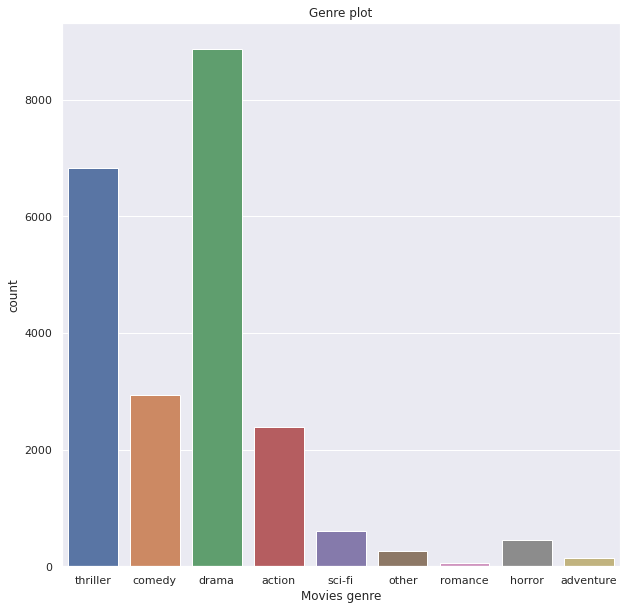

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(x="genre",data=df)
plt.xlabel("Movies genre")
plt.ylabel("count")
plt.title("Genre plot")
plt.show()

In [ ]:
# Mapping the genres to values
genre_mapper={"other":0,"action":1,"adventure":2,"comedy":3,"drama":4,"horror":5,"romance":6,"sci-fi":7,"thriller":8}
df["genre"]=df["genre"].map(genre_mapper)

In [ ]:
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,"t, summa cum laude and all. And I'm about to l...",3
2,"up Come, I have a surprise.... She takes him ...",4
3,ded by the two detectives. INT. JEFF'S APARTME...,8
4,"nd dismounts, just as the other children reach...",4


In [ ]:
df.shape

(22579, 2)

In [ ]:
df["text"]

0        eady dead, maybe even wishing he was. INT. 2ND...
1        t, summa cum laude and all. And I'm about to l...
2         up Come, I have a surprise.... She takes him ...
3        ded by the two detectives. INT. JEFF'S APARTME...
4        nd dismounts, just as the other children reach...
                               ...                        
22574    n in the world to decide what I'm going to do ...
22575    shards. BOJO LAZ! Laz pushes Deke back through...
22576    OTTIE You've got a thing about Ernie's, haven'...
22577    ....with marked skill and dexterity . LANA wry...
22578    rd walks off down the hallway, leaving his pos...
Name: text, Length: 22579, dtype: object

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus=[]
ps=PorterStemmer()

for i in range(0,df.shape[0]):

#  words=nltk.word_tokenize(df["text"][i])
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])
  dialog=dialog.lower()
  words=dialog.split()
  dialog_words=[word for word in words if word not in set(stopwords.words("english"))]
  words=[wordnet.lemmatize(word) for word in dialog_words]
  dialog=" ".join(words)
  corpus.append(dialog)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
corpus[0:10]

['eady dead maybe even wishing int nd floor hallway three night orderly lead liza door orderly white guy open door step room three white guy mid look wild straight jacketed jerry liza reached end rope shake head int decrepit hospital room night balled fetal really head pressed cement try sing jerry blue moon blue moon int nd floor hallway three night liza stand leaning rail wall orderly sure going know bad orderly okay liza start hall orderly following orderly got new patient last week want see liza wave hopeless stop chicken wired window end hall look light break jerry somewhere orderly look gotta get back work',
 'summa cum laude launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grin julie know find excellent editor chief ted yellow page julie let finger walking suddenly music change people ted grin ted playing song extending hand dare ask dance julie taking hand better ted julie begin dancing kissing b g charlie jimmy feign tear charlie sucker happy 

In [ ]:
len(corpus)

22579

In [ ]:
type(corpus)

list

In [ ]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [ ]:
drama_words_list=[]
for i in list(df[df['genre']==4].index):
  drama_words_list.append(corpus[i]) 
drama=""
for i in range(0,4):
  drama+=drama_words_list[i] 
print(drama)  


come surprise take hand lead hallway salvatore look feel pang seems smaller age withers body slightly stooped hair gathered knot back head must tired want rest time funeral salvatore interrupting mamma take hour air know maria smiling ironically tell year salvatore get message feel guilty thinking seems incredible never come maria open door step aside let son whisper put thing go go salvatore lake step flabbergasted sight old room perfectly reconstructed preserved look like museum museum past despite bed clothes cupboard book shelf perfectly clear one ever livednd dismount child reach throw arm embracing charlotte hurry behind martin lock eye enveloped hug child ext fresh water plantation evening summer oak tree covered leaf martin house partially rebuilt habitable workshop already completed martin child nathan samuel margaret william play tall grass front house two great dane charlotte sits front porch nursing infant martin walk workshop trailed susan carry completed rocking chair cha

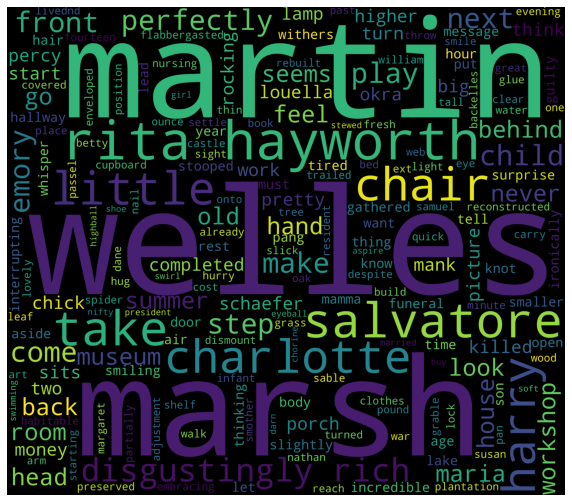

In [ ]:
from wordcloud import WordCloud
wordcloud1=WordCloud(background_color='black',width=4000,height=3500).generate(drama)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud1)

In [ ]:
thriller_words_list=[]
for i in list(df[df['genre']==8].index):
  thriller_words_list.append(corpus[i])
thriller=" "
for i in range(0,4):
  thriller+=thriller_words_list[i]
print(thriller)


 eady dead maybe even wishing int nd floor hallway three night orderly lead liza door orderly white guy open door step room three white guy mid look wild straight jacketed jerry liza reached end rope shake head int decrepit hospital room night balled fetal really head pressed cement try sing jerry blue moon blue moon int nd floor hallway three night liza stand leaning rail wall orderly sure going know bad orderly okay liza start hall orderly following orderly got new patient last week want see liza wave hopeless stop chicken wired window end hall look light break jerry somewhere orderly look gotta get back workded two detective int jeff apartment night medium shot thorwald fight dislodge jeff grip ext jeff apartment night close shot looking jeff face showing strain pain thorwald attack brick floor patio seems hundred foot int jeff apartment night medium shot thorwald jeff struggling ext neighborhood night semi close shot doyle pulling top wall lisa stella two men looking lisa white fac

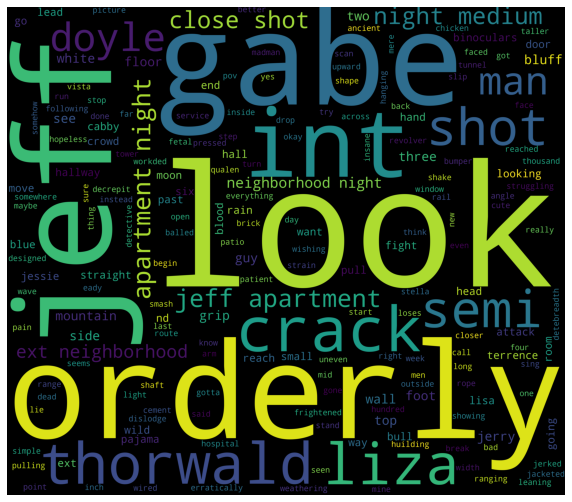

In [ ]:
wordcloud2=WordCloud(background_color='black',width=4000,height=3500).generate(thriller)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud2)

In [ ]:
comedy_words_list=[]
for i in list(df[df['genre']==3].index):
  comedy_words_list.append(corpus[i])
comedy=" "
for i in range(0,4):
  comedy+=comedy_words_list[i]
print(comedy)

 summa cum laude launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grin julie know find excellent editor chief ted yellow page julie let finger walking suddenly music change people ted grin ted playing song extending hand dare ask dance julie taking hand better ted julie begin dancing kissing b g charlie jimmy feign tear charlie sucker happy ending hugging jimmy hold start rise nelson house cloud xenia ted v guess everybody pretty much lived happily ever parent give grocery store descend cloud quickly find ext london buckingham palace day mom dad take picture smooch front palace ted v manage sneak away second honeymoonsay man go far people say gone far say keep good man course still lot learn big noise made st valentine day good public relation letting two witness get away sure careless table joe jerry try make small possible spat worry two guy good dead almost caught today bonaparte turning hearing aid mean let get away twice click tongue people would 

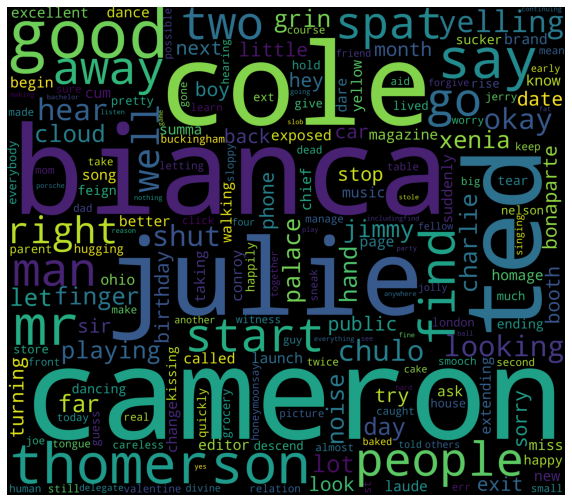

In [ ]:
wordcloud3=WordCloud(background_color='black',width=4000,height=3500).generate(comedy)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud3)

In [ ]:
#Feature generation using BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000,ngram_range=(1,1))
X=cv.fit_transform(corpus).toarray()
y=df["genre"].values


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pickle.dump(cv,open("cv-transform.pkl","wb"))

In [ ]:
#model building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print("X_train:{},X_test:{}".format(X_train.shape,X_test.shape))


X_train:(18063, 10000),X_test:(4516, 10000)


In [ ]:
#Fitting Naive_Bayes to training set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
nb=MultinomialNB(alpha=0.1)
nb.fit(X_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.90      0.95      0.93       476
           2       1.00      0.89      0.94        45
           3       0.89      0.93      0.91       559
           4       0.94      0.91      0.93      1827
           5       0.84      0.85      0.85        82
           6       0.73      1.00      0.85        11
           7       0.91      0.87      0.89       132
           8       0.91      0.92      0.91      1318

    accuracy                           0.92      4516
   macro avg       0.90      0.92      0.91      4516
weighted avg       0.92      0.92      0.92      4516



In [ ]:
score=accuracy_score(y_test,y_pred)
print("Accuracy score is {}%".format(round(score*100,2)))

Accuracy score is 91.78%


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[  64,    0,    0,    0,    0,    1,    0,    0,    1],
       [   0,  453,    0,    8,    5,    0,    0,    0,   10],
       [   0,    1,   40,    0,    3,    0,    0,    0,    1],
       [   0,    6,    0,  520,   18,    1,    0,    2,   12],
       [   2,   28,    0,   29, 1661,    7,    3,    4,   93],
       [   0,    3,    0,    3,    4,   70,    0,    0,    2],
       [   0,    0,    0,    0,    0,    0,   11,    0,    0],
       [   0,    3,    0,    1,    6,    0,    0,  115,    7],
       [   0,    8,    0,   21,   67,    4,    1,    6, 1211]])

Text(0.5, 1.0, 'Confusion Matrix for Multinomial Naive Bayes')

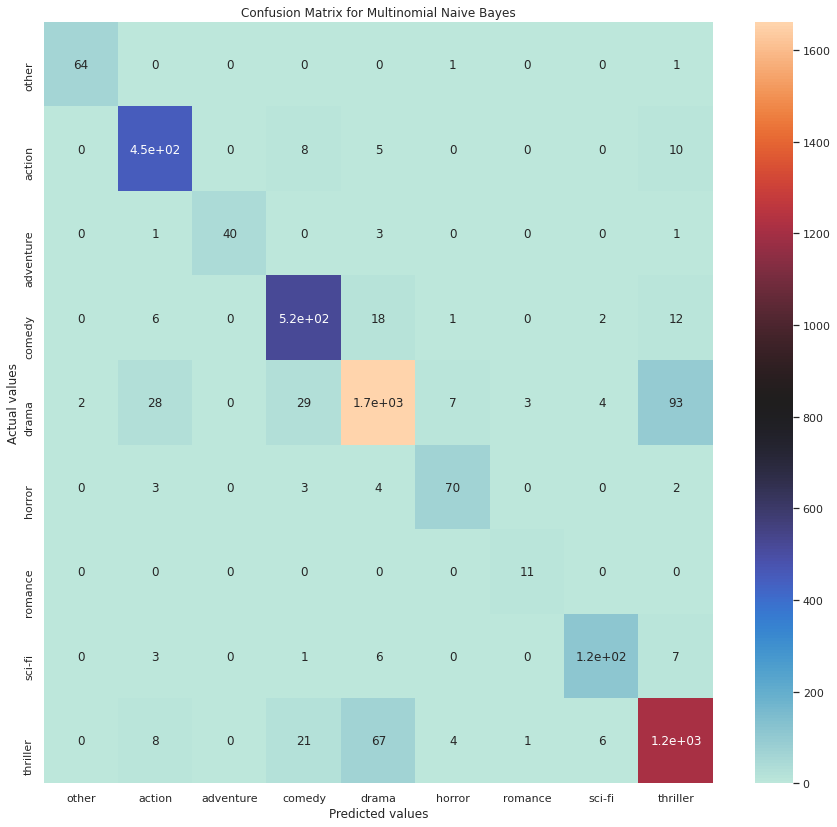

In [ ]:
plt.figure(figsize=(15,14))
axis_labels=['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=cm,annot=True,xticklabels=axis_labels,yticklabels=axis_labels,linecolor="White",cmap="icefire")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix for Multinomial Naive Bayes")


In [ ]:
#Hyperparameter tuning Naive Bayes Classifier
best_score=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
  temp_nb=MultinomialNB(alpha=i)
  temp_nb.fit(X_train,y_train)
  temp_nb_y_pred=temp_nb.predict(X_test)
  temp_score=accuracy_score(y_test,temp_nb_y_pred)
  print("Accuracy score for alpha={} is {}%:".format(round(i,1),round(temp_score*100,2)))
  if temp_score>best_score:
    best_score=temp_score
    alpha_val=i
  print("The best accuracy is {}% with alpha ={}".format(round(best_score*100,2),round(alpha_val,1)))  

Accuracy score for alpha=0.1 is 91.78%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.2 is 91.34%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.3 is 91.16%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.4 is 91.12%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.5 is 90.92%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.6 is 90.57%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.7 is 90.46%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.8 is 90.28%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=0.9 is 90.15%:
The best accuracy is 91.78% with alpha =0.1
Accuracy score for alpha=1.0 is 90.1%:
The best accuracy is 91.78% with alpha =0.1


In [ ]:
filename="model-nlp-mnb.pkl"
pickle.dump(nb,open(filename,"wb"))